<h2> Explore - Data Patterns and Trends</h2>
Exploration for Relationships, Odd Data, & Outliers

# Visualizations

In [248]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-colorblind')
%matplotlib inline

In [249]:
# Read in cleaned Kings County file 
df = pd.read_csv("cleaned_kings.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,01/01/1970,180000.0,2,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,01/01/1970,604000.0,4,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,01/01/1970,510000.0,3,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [250]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21420.000000,21420.000000,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,10709.500000,10802.537535,4.580940e+09,5.418614e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,...,7.662792,1791.170215,285.937021,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,6183.565719,6239.147834,2.876761e+09,3.675569e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,...,1.171971,828.692965,440.012962,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,0.000000,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,5354.750000,5396.750000,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,10709.500000,10801.500000,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,16064.250000,16212.250000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,...,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,21419.000000,21596.000000,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


## Looking for Interesting Relationships by Pairs

### Map of King County Washington
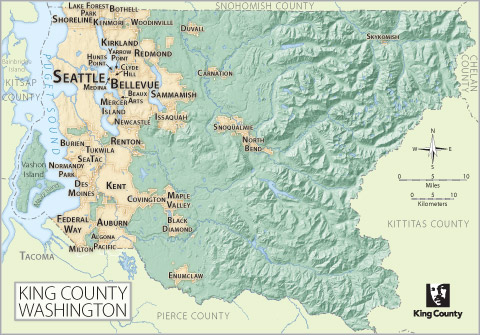
    

### Location vs Price
For fun - heatmap relating price to location - a great use of lat and long

Higher priced homes appear sporadically around the water, especially Lake Washington on the east side.

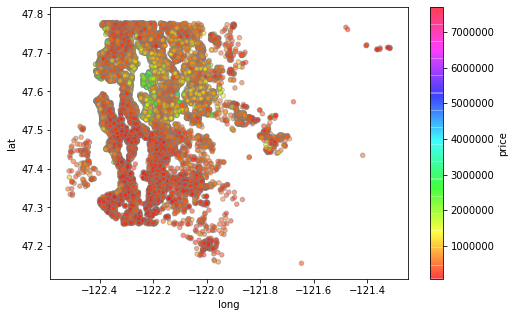

In [251]:
# Color coded plot of homes by price and location
df.plot(kind='scatter', x='long', y='lat', alpha=0.5, figsize=(8,5), 
        c='price', cmap='hsv', colorbar=True, sharex=False, edgecolors='gray');

### Heatmap: Correlation by Pairs

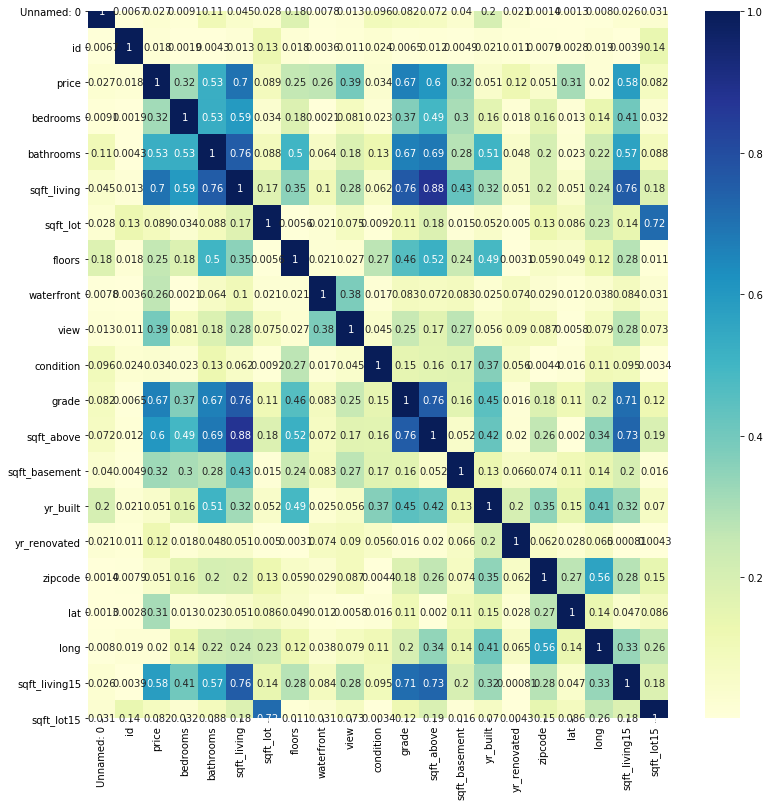

In [245]:
# heatmap to show relationships
plt.figure(figsize=(13,13))
sns.heatmap(df.corr().abs(), annot=True, cmap='YlGnBu');

### Heatmap Observations

Looking for variables with a high correlation with price but a low correlation with each other (possible good predictor without collinearity). 

* Strong features to predict price: grade, sqft_living
* The first question will be to see if grade and sqft_living produce a strong model

## Search for Outliers and Patterns

### Limit the Columns
I've eliminated columns with small correlation as indicated by the heatmap as likely insignificant. Features removed are waterfront, id, date, zipcode, lat, and long.


In [77]:
# Interesting features
features = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade',
            'sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,1530,1509
21416,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,1830,7200
21417,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,1020,2007
21418,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,1410,1287


### Create boxplots to find outliers

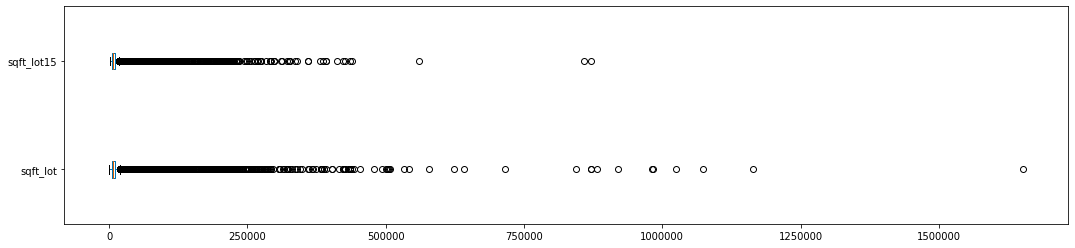

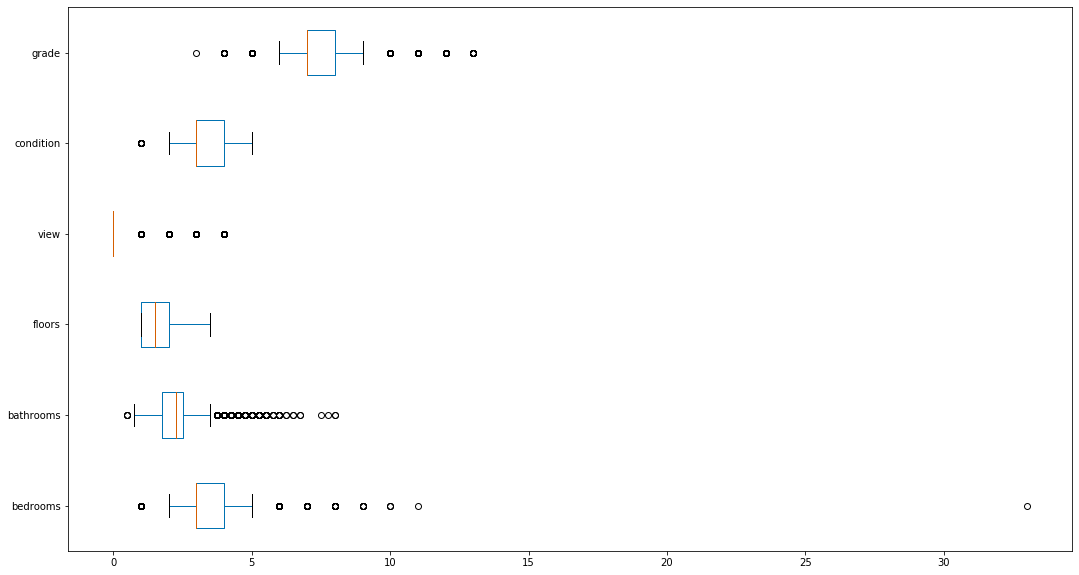

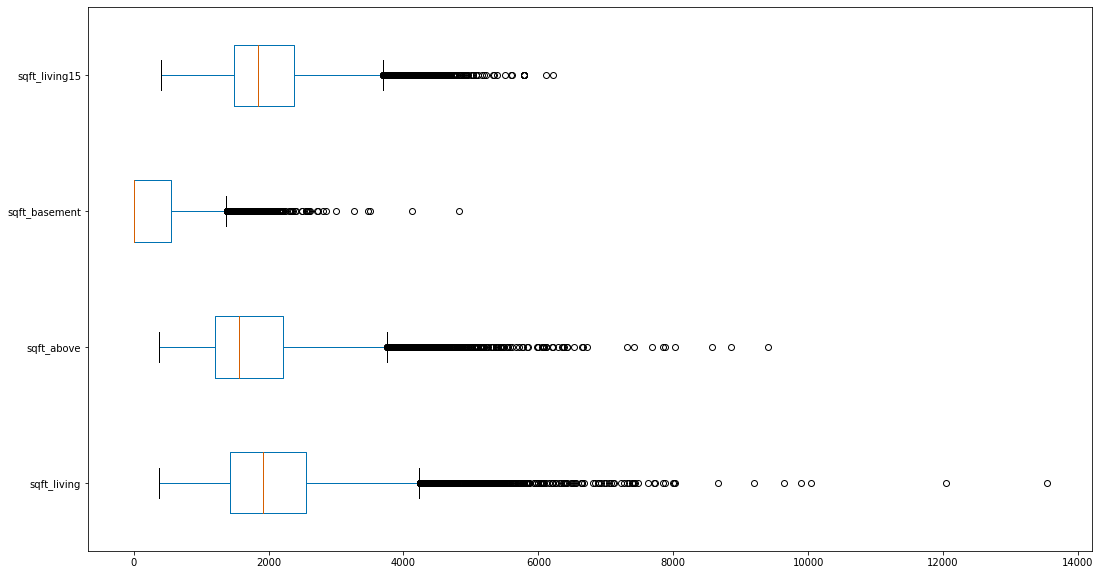

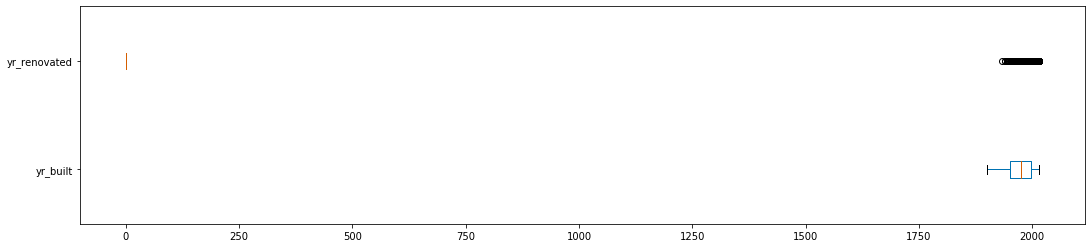

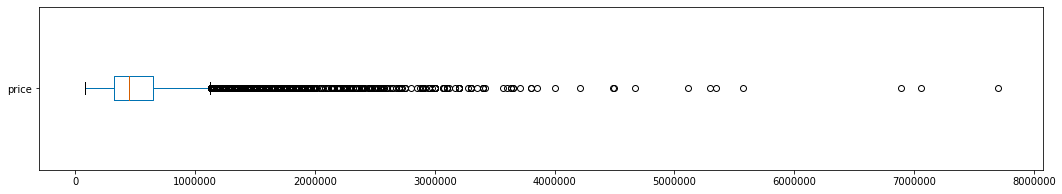

In [85]:
# Create boxplots for each feature. Split data by similar size
features1 = features[['sqft_lot', 'sqft_lot15']]
features1.plot(kind='box', vert=False, figsize=(18,4));

features2 = features[['bedrooms','bathrooms','floors','view','condition','grade']]
features2.plot(kind='box', vert=False, figsize=(18,10));

features3 = features[['sqft_living','sqft_above','sqft_basement','sqft_living15']]
features3.plot(kind='box', vert=False, figsize=(18,10));

features4 = features[['yr_built','yr_renovated']]
features4.plot(kind='box', vert=False, figsize=(18,4));

df[['price']].plot(kind='box', vert=False, figsize=(18,3))

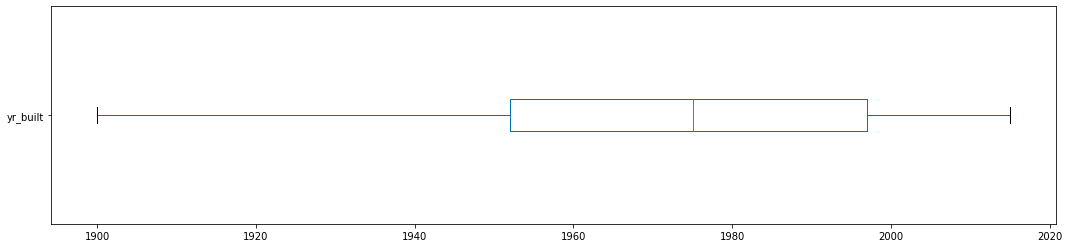

In [124]:
# Checking year built without anomalous renovated
features5 = features[['yr_built']]
features5.plot(kind='box', vert=False, figsize=(18,4));

### Year renovated and bedrooms need to be evaluated for irrelevant values
* 'renovated' has values of 0 which should be removed - I will remember this for future use
* 'bedrooms' appears to have an anomoly

### Bedrooms Anomaly
It seems we have a small house with 33 bedrooms. I feel sure this is a typo so I will change the bedrooms to 3.  

In [106]:
# Find anomalous value
df['bedrooms'].max()

33

In [110]:
# Change the value to 3 since it seems to be a typo - One floor, 1620 sqft and 1.75 baths
df['bedrooms'] = df['bedrooms'].replace(33,3)
df['bedrooms'].max()

11

In [112]:
# Save the file with updated outliers
df.to_csv('cleaned_kings.csv')

### Square Foot Living and Price
Investigation to see if the highest values go together or if there is an anomaly

In [118]:
# Identify highest price and sqft_living
print(df['price'].max())
df['sqft_living'].max()

7700000.0


13540

In [123]:
# Check highest priced homes
df.sort_values(by='price').tail(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8560,8629,3835500195,01/01/1970,4490000.0,4,3.00,6430,27517,2.0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592
2601,2624,7738500731,01/01/1970,4500000.0,5,5.50,6640,40014,2.0,1,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8023,8085,1924059029,01/01/1970,4670000.0,5,6.75,9640,13068,1.0,1,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
1152,1162,1247600105,01/01/1970,5110000.0,5,5.25,8010,45517,2.0,1,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1301,1313,7558700030,01/01/1970,5300000.0,6,6.00,7390,24829,2.0,1,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1434,1446,8907500070,01/01/1970,5350000.0,5,5.00,8000,23985,2.0,0,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4371,4407,2470100110,01/01/1970,5570000.0,5,5.75,9200,35069,2.0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9170,9245,9208900037,01/01/1970,6890000.0,6,7.75,9890,31374,2.0,0,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3877,3910,9808700762,01/01/1970,7060000.0,5,4.50,10040,37325,2.0,1,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7187,7245,6762700020,01/01/1970,7700000.0,6,8.00,12050,27600,2.5,0,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [121]:
# Check largest home
df[df['sqft_living']==13540]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12651,12764,1225069038,01/01/1970,2280000.0,7,8.0,13540,307752,3.0,0,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


The largest home and highest price home are out of the normal range but do not appear to be innappropriate values. At a glance, the largest home appears to have a reasonable and may be a steal or it could be a fixer upper or money pit.

## Visual Notables
Items appearing closely correlated and may be collinear:
* grade and most sqft measurements
* number of bathrooms and number of rooms
* zipcode along with related longitude and latitudes

Possible items to explore:
* grade to price
* price of homes before and after renovations
* sales at certain times of the year
* split price by zipcode


## Searching for Normal 
There are three interrelated approaches to determine normality and all three will be conducted.
1. Look at a histogram with the normal curve superimposed.
2. Look at the values of Skewness using the Shapiro-Wilkes test 
3. Look at normality plots of the data using the Normal Q-Q Plot

### Histograms  by features

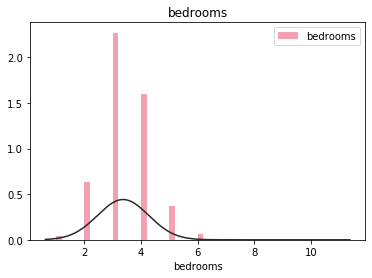

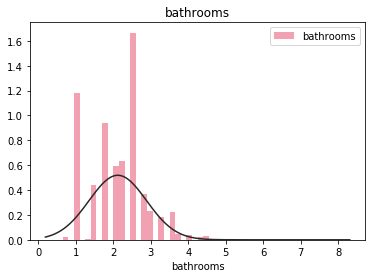

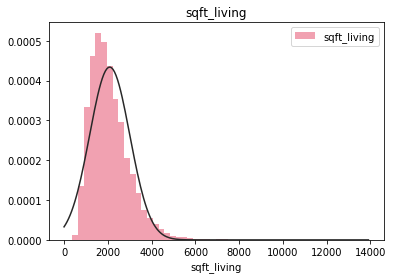

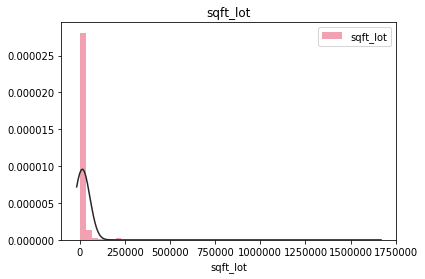

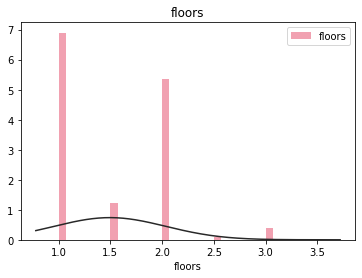

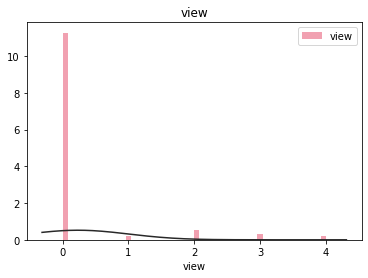

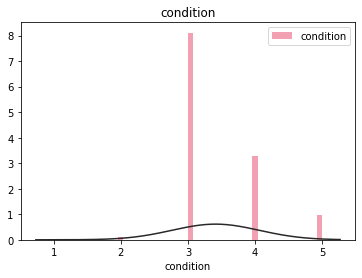

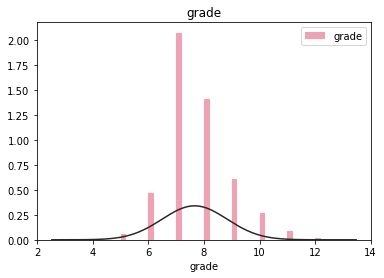

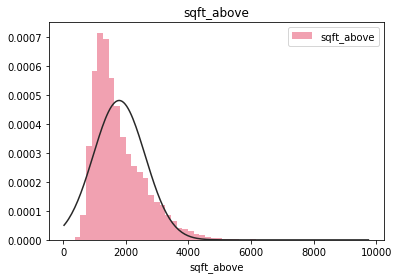

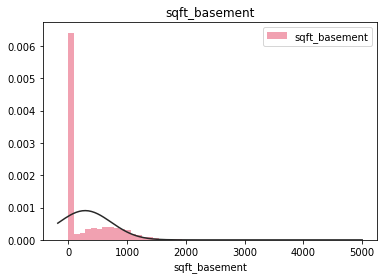

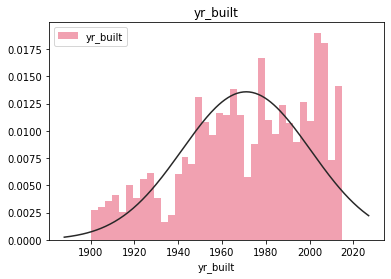

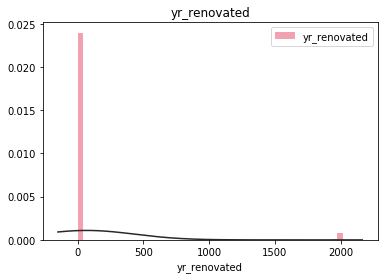

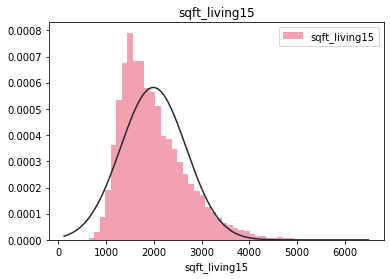

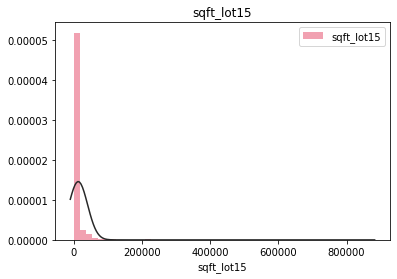

In [218]:
# Create a loop to display all the histograms
for item in features:
    #df[item].plot.hist(bins=50, color='crimson', figsize=(5,5), grid=True, label=item + ' Histogram')
    #df[item].plot.kde(label=item + ' KDE', color='orange')
    sns.distplot(df[item], color='crimson', label=item, fit=norm, kde=False)
    plt.title(item)
    plt.legend()
    plt.show()

### Observations
* sqft_living15 is nearly normal with a slight right skew
* need to remove 0s in year renovated
* yr_built has a slight left skew
* sqft_basement needs 0s removed then otherwise nearly normal, slight skew right
* sqft_above is nearly normal with slight skew right
* grade is categorical and nearly normal
* condition is skewed left
* for view, if you remove 0s it may be normal
* floors is categorical and slightly skewed right
* sqft_lot and sqft_lot15 need attention as it appears to be significantly skewed right
* bathrooms is categorical and slightly skewed right
* bedrooms is categorical and is nearly normal, slight right skew

@ Need to remove 0s for yr_renovated, sqft_basement, and view

## Zero Outliers Removed
Remove the 0s from yr_renovated, sqft_basement, and view

740
0.03454715219421102


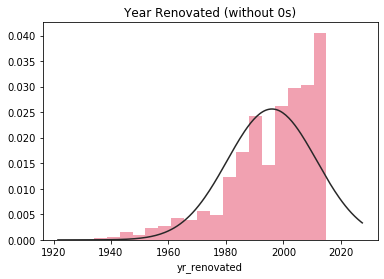

In [223]:
# Remove 0s from renovated and create histograms again
no0s_yr_renovated = features[features['yr_renovated'] != 0]

# Find the number of homes renovated
print(len(no0s_yr_renovated))
print(len(no0s_yr_renovated) / len(features))

# Create histogram
sns.distplot(no0s_yr_renovated['yr_renovated'], color='crimson', label=no0s_yr_renovated, fit=norm, kde=False)
plt.title('Year Renovated (without 0s)')
plt.show()

8252
0.38524743230625585


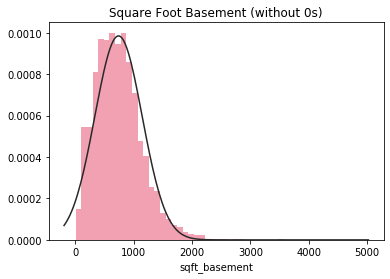

In [228]:
# Remove 0s from sqft_basement and create histograms again
no0s_sqft_basement = features[features['sqft_basement'] != 0]

# Find the number of homes with basements
print(len(no0s_sqft_basement))
print(len(no0s_sqft_basement) / len(features))

# Create histogram
sns.distplot(no0s_sqft_basement['sqft_basement'], color='crimson', label=no0s_sqft_basement, fit=norm, kde=False)
plt.title('Square Foot Basement (without 0s)')
plt.show()

2104
0.09822595704948646


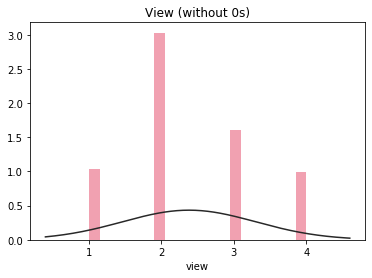

In [229]:
# Remove 0s from view and create histograms again
no0s_view = features[features['view'] != 0]

# Find the number of homes viewed
print(len(no0s_view))
print(len(no0s_view) / len(features))

# Create histogram
sns.distplot(no0s_view['view'], color='crimson', label=no0s_view, fit=norm, kde=False)
plt.title('View (without 0s)')
plt.show()

### Observations after removing 0s
* View 
    * nearly normal
    * only 2104 had a view (9.8% of homes)
* Basement sqft 
    * nearly normal with a skew right
    * 8252 homes with basements (38.5%)
* Year renovated
    * skewed left
    * only 740 homes were renovated (3.4%)

### Treatment of outliers for sqft_lot and sqft_lot15
Will calculate the outliers using the outlier formula and remove.

In [188]:
# Calculate the sqft_lot limit for outliers using 1.5 * IQR + Q3
Q1 = features['sqft_lot'].quantile(0.25)
Q3 = features['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1
limit = 1.5 * IQR + Q3
limit

19166.25

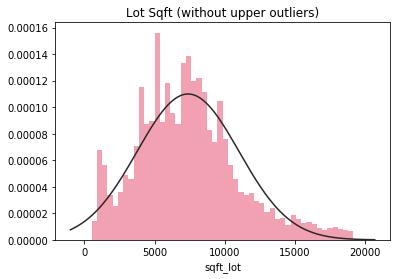

19014 21420


In [243]:
# Remove upper outliers from sqft_lot and create histograms again
no_ol_sqft_lot = features[features['sqft_lot'] < limit]

sns.distplot(no_ol_sqft_lot['sqft_lot'], color='crimson', label=no_ol_sqft_lot, fit=norm, kde=False)
plt.title('Lot Sqft (without upper outliers)')
plt.show()
print(len(no_ol_sqft_lot), len(features))

In [182]:
# Calculate the sqft_lot15 limit for outliers using 1.5 * IQR + Q3
Q1 = features['sqft_lot15'].quantile(0.25)
Q3 = features['sqft_lot15'].quantile(0.75)
IQR = Q3 - Q1
limit = 1.5 * IQR + Q3
limit

17565.625

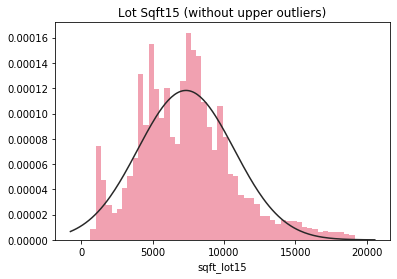

19411 21420


In [244]:
# Remove upper outliers from sqft_lot15 and create histograms again
no_ol_sqft_lot15 = features[features['sqft_lot15'] < limit]

sns.distplot(no_ol_sqft_lot15['sqft_lot15'], color='crimson', label=no_ol_sqft_lot15, fit=norm, kde=False)
plt.title('Lot Sqft15 (without upper outliers)')
plt.show()
print(len(no_ol_sqft_lot15), len(features))


### Outlier Removal Observations
* lot_sqft and lot_sqft15 with upper outliers removed
    * both look nearly normal 
    * both are slightly skewed right